# **GRIP: The Sparks Foundation**


 **GRIPDECEMBER22**

**Author: Shaziya Shaikh (Data Science and Business Intelligence Intern)**

Problem Statement: For the given Iris data set predict the optimum number of clusters and represent it visually

In [ ]:
# Importing Important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [ ]:
# importing data set
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# cheking for null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
x = df.iloc[:,[0,3]].values

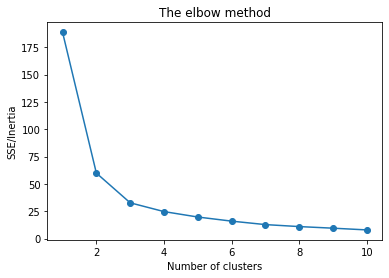

In [ ]:
#finding optimal number of clusters in k-mean classification
#elbow method
from sklearn.cluster import KMeans
l = []

#iteration
for i in range(1,11):
    Kmeans = KMeans(n_clusters = i , init='k-means++', random_state = 0)
    Kmeans.fit(x)
    l.append(Kmeans.inertia_)
plt.plot(range(1,11),l)
plt.scatter(range(1,11),l)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE/Inertia')
plt.show()

**Elbow method is used to determine the most optimal value of K representing number of clusters in K-means clustering algorithm.In the line plot, the point at this the SSE or inertia values start decreasing in a linear manner is called as elbow point.In the above graph, you may note that it is no. of clusters = 3 where the SSE starts decreasing in the linear manner.**

In [ ]:
# creating k-means classifier model
Kmeans = KMeans(n_clusters = 3 , init='k-means++', random_state = 0)
Kmeans.fit(x)
y_predict = Kmeans.predict(x)

In [ ]:
# predicted clusters
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 2, 0, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2], dtype=int32)

Text(0.5, 1.0, 'Petal Length vs Petal Width')

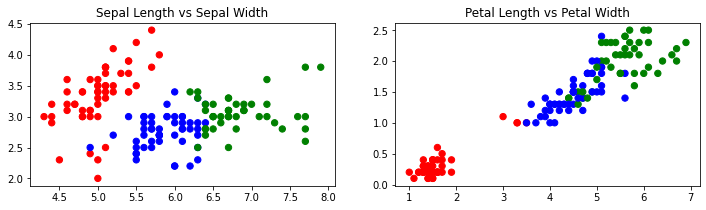

In [ ]:
# visualisation of feature pattern 
plt.figure(figsize=(12,3)) # set figure size
colors = np.array(['red', 'green', 'blue']) # colour for each species
plt.subplot(1, 2, 1) 
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=colors[y_predict], s=40) # scatter plot for sepal lengh to sepal width
plt.title('Sepal Length vs Sepal Width')
plt.subplot(1,2,2)
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c=colors[y_predict], s=40) # scatter plot for petal lenght to petal width
plt.title('Petal Length vs Petal Width')

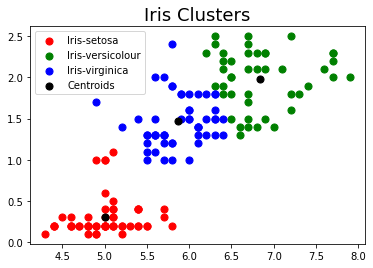

In [ ]:
#visulaize results
plt.scatter(x[y_predict==0, 0],x[y_predict==0, 1], s=50, c='red',label="Iris-setosa")
plt.scatter(x[y_predict==1,0],x[y_predict==1,1], s=50, c='green',label="Iris-versicolour")
plt.scatter(x[y_predict==2,0],x[y_predict==2,1], s=50, c='blue',label="Iris-virginica")
plt.scatter(Kmeans.cluster_centers_[:,0],Kmeans.cluster_centers_[:,1],s=50,c='black',label='Centroids')
plt.title('Iris Clusters',fontsize=18)
plt.legend()